In [701]:
import os

from scipy import stats

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [702]:
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")
        
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n") 

In [703]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

masterdata_csv = pd.read_csv('data.csv')
masterdata_csv.replace(r'   ', np.NaN)

masterdata_csv = masterdata_csv.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(masterdata_csv)

masterdata_csv.to_csv("data1.csv")


      Hour  Immobilized_bus  Broken_Truck Vehicle_excess Accident_victim  \
0     7:00              0.0           0.0              T             0.0   
1     7:30              0.0           0.0              F             0.0   
2     8:00              0.0           0.0              F             0.0   
3     8:30              0.0           0.0              F             0.0   
4     9:00              0.0           0.0              F             0.0   
5     9:30              0.0           0.0              F             0.0   
6    10:00              0.0           0.0              F             0.0   
7    10:30              0.0           0.0              F             0.0   
8    11:00              0.0           0.0              F             0.0   
9    11:30              0.0           0.0              F             0.0   
10   12:00              0.0           0.0              F             0.0   
11   12:30              0.0        1000.0              F             0.0   
12   13:00  

In [704]:
df = masterdata_csv
df.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent'],
      dtype='object')

In [705]:
print(df['Hour'].unique())
print(df['Immobilized_bus'].unique())
print(df['Broken_Truck'].unique())
print(df['Vehicle_excess'].unique())
print(df['Accident_victim'].unique())
print(df['Running_over'].unique())
print(df['Fire_vehicles'].unique())
print(df['Occurrence_involving_freight'].unique())
print(df['Incident_involving_dangerous_freight'].unique())
print(df['Lack_of_electricity'].unique())
print(df['Fire'].unique())
print(df['Point_of_flooding'].unique())
print(df['Manifestations'].unique())
print(df['Defect_in_the_network_of_trolleybuses'].unique())
print(df['Tree_on_the_road'].unique())
print(df['Semaphore_off'].unique())
print(df['Intermittent_Semaphore'].unique())
print(df['Slowness_in_traffic_percent'].unique())


['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
[0. 2. 1. 4.]
[   0. 1000.    2.    1.    5.    4.    3.]
[' T' ' F' ' f']
[' 0.0' ' 1.0' ' 2.0' ' 3.0' ' -0.0' nan]
[' 0.0' ' NO' ' 1.0' ' 2.0' ' -1.0']
[' NO' ' 0.0' ' YES']
[0. 1.]
[' 0.0' ' 1.0' nan]
[0. 1. 2. 4. 3.]
[0. 1.]
[0.e+00 2.e+03 1.e+00 3.e+00 7.e+00]
[ 0.  1. -1.]
[' 0.0' ' 1.0' ' 3.0' ' 2.0' ' -8.0' nan]
[0. 1.]
[' 0.0' ' 1.0' ' 2.0' ' 4.0' nan]
[0. 1.]
[ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.
 10.3  7.9  7.7  8.5  7.8  8.4  9.3 11.  12.1 13.1 13.7 15.3 16.8 15.6
  3.4  3.8  5.9  7.   6.2  6.5  6.8 10.1 12.2 13.9 15.  17.1 19.6 20.2
 22.6 23.4 19.3  4.   5.   5.7  5.6 10.8 12.5 10.5 18.3 19.9 21.5 22.1
  5.5  9.  12.3 11.9  9.7  8.9 11.3 13.  14.6 17.4 17.8 18.1

In [706]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [707]:
traffic_df = pd.DataFrame()

traffic_df['Hour'] = df['Hour']
traffic_df['Immobilized_bus'] = df['Immobilized_bus']
traffic_df['Broken_Truck'] = df['Broken_Truck']
traffic_df['Vehicle_excess'] = df['Vehicle_excess']
traffic_df['Accident_victim'] = df['Accident_victim']
traffic_df['Running_over'] = df['Running_over']
traffic_df['Fire_vehicles'] = df['Fire_vehicles']
traffic_df['Occurrence_involving_freight'] = df['Occurrence_involving_freight']
traffic_df['Incident_involving_dangerous_freight'] = df['Incident_involving_dangerous_freight']
traffic_df['Lack_of_electricity'] = df['Lack_of_electricity']
traffic_df['Fire'] = df['Fire']
traffic_df['Point_of_flooding'] = df['Point_of_flooding']
traffic_df['Manifestations'] = df['Manifestations']
traffic_df['Defect_in_the_network_of_trolleybuses'] = df['Defect_in_the_network_of_trolleybuses']
traffic_df['Tree_on_the_road'] = df['Tree_on_the_road']
traffic_df['Semaphore_off'] = df['Semaphore_off']
traffic_df['Intermittent_Semaphore'] = df['Intermittent_Semaphore']
traffic_df['Slowness_in_traffic_percent'] = df['Slowness_in_traffic_percent']

In [708]:
traffic_df.dtypes


Hour                                      object
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                            object
Accident_victim                           object
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight      object
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses     object
Tree_on_the_road                         float64
Semaphore_off                             object
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object

In [709]:
traffic_df['Vehicle_excess'] = traffic_df['Vehicle_excess'].astype(str)

traffic_df['Accident_victim']= traffic_df['Accident_victim'].astype(str).astype(float)
traffic_df['Running_over']= traffic_df['Running_over'].astype(str)
traffic_df['Fire_vehicles']= traffic_df['Fire_vehicles'].astype(str)

traffic_df['Incident_involving_dangerous_freight'] = traffic_df['Incident_involving_dangerous_freight'].astype(str).astype(float)

traffic_df['Defect_in_the_network_of_trolleybuses'] = traffic_df['Defect_in_the_network_of_trolleybuses'].astype(str).astype(float)

traffic_df['Semaphore_off'] = traffic_df['Semaphore_off'].astype(str).astype(float)




In [710]:
traffic_df.dtypes

Hour                                      object
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                            object
Accident_victim                          float64
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight     float64
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses    float64
Tree_on_the_road                         float64
Semaphore_off                            float64
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object

In [711]:
mode_a = stats.mode(traffic_df['Accident_victim'])
print(mode_a[0])

traffic_df['Accident_victim'] = traffic_df['Accident_victim'].fillna(traffic_df['Accident_victim'].mode()[0])

mode_s = stats.mode(traffic_df['Semaphore_off'])

traffic_df['Semaphore_off'] = traffic_df['Semaphore_off'].fillna(traffic_df['Semaphore_off'].mode()[0])


mode_i = stats.mode(traffic_df['Incident_involving_dangerous_freight'])
print(mode_i)

traffic_df['Incident_involving_dangerous_freight'] = traffic_df['Incident_involving_dangerous_freight'].fillna(traffic_df['Incident_involving_dangerous_freight'].mode()[0])

print(traffic_df['Incident_involving_dangerous_freight'])



[0.]
ModeResult(mode=array([0.]), count=array([137]))
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
135    0.0
136    0.0
137    0.0
138    0.0
139    0.0
Name: Incident_involving_dangerous_freight, Length: 140, dtype: float64


In [712]:

traffic_df['Defect_in_the_network_of_trolleybuses'] = traffic_df['Defect_in_the_network_of_trolleybuses'].fillna(traffic_df['Defect_in_the_network_of_trolleybuses'].mode()[0])
#m = stats.mode(traffic_df['Defect_in_the_network_of_trolleybuses'])
#print(m)

In [713]:
print(traffic_df['Hour'])

0       7:00
1       7:30
2       8:00
3       8:30
4       9:00
       ...  
135    18:00
136    18:30
137    19:00
138    19:30
139    20:00
Name: Hour, Length: 140, dtype: object


In [714]:
dictionary = {':':'.'}
traffic_df['Hour'].replace(dictionary, regex=True,inplace=True)
traffic_df['Hour'] = traffic_df['Hour'].astype(str).astype(float)

traffic_df['Vehicle_excess'] = traffic_df['Vehicle_excess'].str.upper() 

dictionary_1 = {'T':'1','F':'0'}
traffic_df['Vehicle_excess'].replace(dictionary_1, regex=True,inplace=True)
traffic_df['Vehicle_excess'] = traffic_df['Vehicle_excess'].astype(str).astype(float)

print(traffic_df['Hour'])

#Running_over   
dictionary_2 = {'YES':'1','NO':'0'}
traffic_df['Running_over'].replace(dictionary_2, regex=True,inplace=True)
traffic_df['Running_over'] = traffic_df['Running_over'].astype(str).astype(float)

#Fire_vehicles   

dictionary_3 = {'YES':'1','NO':'0'}
traffic_df['Fire_vehicles'].replace(dictionary_3, regex=True,inplace=True)
traffic_df['Fire_vehicles'] = traffic_df['Fire_vehicles'].astype(str).astype(float)


0       7.0
1       7.3
2       8.0
3       8.3
4       9.0
       ... 
135    18.0
136    18.3
137    19.0
138    19.3
139    20.0
Name: Hour, Length: 140, dtype: float64


In [715]:
#group_names = ['Moring', 'Afternoon', 'Noon', 'Evening']
#traffic_df['Hour_Binned'] = pd.cut(traffic_df['Hour'], 4, labels=group_names)

In [716]:
#traffic_df[['Hour','Hour_Binned']].tail(100)

In [717]:
#traffic_df['Hour_Binned'].unique()

In [718]:
traffic_df.dtypes

Hour                                     float64
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                           float64
Accident_victim                          float64
Running_over                             float64
Fire_vehicles                            float64
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight     float64
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses    float64
Tree_on_the_road                         float64
Semaphore_off                            float64
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object

In [719]:

show_missing_values(traffic_df)

Hour
False    140
Name: Hour, dtype: int64

Immobilized_bus
False    140
Name: Immobilized_bus, dtype: int64

Broken_Truck
False    140
Name: Broken_Truck, dtype: int64

Vehicle_excess
False    140
Name: Vehicle_excess, dtype: int64

Accident_victim
False    140
Name: Accident_victim, dtype: int64

Running_over
False    140
Name: Running_over, dtype: int64

Fire_vehicles
False    140
Name: Fire_vehicles, dtype: int64

Occurrence_involving_freight
False    140
Name: Occurrence_involving_freight, dtype: int64

Incident_involving_dangerous_freight
False    140
Name: Incident_involving_dangerous_freight, dtype: int64

Lack_of_electricity
False    140
Name: Lack_of_electricity, dtype: int64

Fire
False    140
Name: Fire, dtype: int64

Point_of_flooding
False    140
Name: Point_of_flooding, dtype: int64

Manifestations
False    140
Name: Manifestations, dtype: int64

Defect_in_the_network_of_trolleybuses
False    140
Name: Defect_in_the_network_of_trolleybuses, dtype: int64

Tree_on_the_road

In [720]:
show_unique_values(traffic_df)

Unique value for dataset attributes :

Hour   [ 7.   7.3  8.   8.3  9.   9.3 10.  10.3 11.  11.3 12.  12.3 13.  13.3
 14.  14.3 15.  15.3 16.  16.3 17.  17.3 18.  18.3 19.  19.3 20. ] 

Immobilized_bus   [0. 2. 1. 4.] 

Broken_Truck   [   0. 1000.    2.    1.    5.    4.    3.] 

Vehicle_excess   [1. 0.] 

Accident_victim   [0. 1. 2. 3.] 

Running_over   [ 0.  1.  2. -1.] 

Fire_vehicles   [0. 1.] 

Occurrence_involving_freight   [0. 1.] 

Incident_involving_dangerous_freight   [0. 1.] 

Lack_of_electricity   [0. 1. 2. 4. 3.] 

Fire   [0. 1.] 

Point_of_flooding   [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00] 

Manifestations   [ 0.  1. -1.] 

Defect_in_the_network_of_trolleybuses   [ 0.  1.  3.  2. -8.] 

Tree_on_the_road   [0. 1.] 

Semaphore_off   [0. 1. 2. 4.] 

Intermittent_Semaphore   [0. 1.] 

Slowness_in_traffic_percent   [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.
 10.3  7.9  7.7  8.5  7.8 

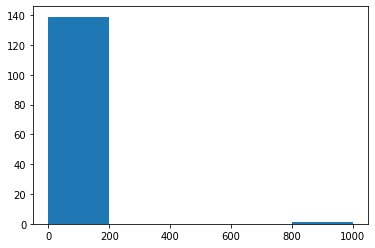

In [721]:
traffic_df['Broken_Truck'].hist(bins=5, grid=False)

In [722]:
q_hi = traffic_df["Broken_Truck"].quantile(0.99)

traffic_df_filtered = traffic_df[traffic_df["Broken_Truck"] < q_hi]

q_low = traffic_df["Defect_in_the_network_of_trolleybuses"].quantile(0.25)

traffic_df_filtered = traffic_df_filtered[traffic_df_filtered["Defect_in_the_network_of_trolleybuses"] >= q]

In [723]:
show_unique_values(traffic_df_filtered)

Unique value for dataset attributes :

Hour   [ 7.   7.3  8.   8.3  9.   9.3 10.  10.3 11.  11.3 12.  13.  13.3 14.
 14.3 15.  15.3 16.  16.3 17.  17.3 18.  18.3 19.  19.3 20.  12.3] 

Immobilized_bus   [0. 2. 1. 4.] 

Broken_Truck   [0. 2. 1. 4. 3.] 

Vehicle_excess   [1. 0.] 

Accident_victim   [0. 1. 2. 3.] 

Running_over   [ 0.  1.  2. -1.] 

Fire_vehicles   [0. 1.] 

Occurrence_involving_freight   [0. 1.] 

Incident_involving_dangerous_freight   [0. 1.] 

Lack_of_electricity   [0. 1. 2. 4. 3.] 

Fire   [0. 1.] 

Point_of_flooding   [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00] 

Manifestations   [ 0.  1. -1.] 

Defect_in_the_network_of_trolleybuses   [0. 1. 3. 2.] 

Tree_on_the_road   [0. 1.] 

Semaphore_off   [0. 1. 2. 4.] 

Intermittent_Semaphore   [0. 1.] 

Slowness_in_traffic_percent   [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.8  4.9  5.1
  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.  10.3
  7.9  7.7  8.5  7.8  9.3 11.  12.1 13.1 13.7 15.3 16.8 15.6 

In [724]:
traffic_df_filtered.loc[traffic_df_filtered['Running_over'] < 1, 'Running_over'] = 0
traffic_df_filtered.loc[traffic_df_filtered['Running_over'] > 0, 'Running_over'] = 1

traffic_df_filtered.loc[traffic_df_filtered['Manifestations'] > 0, 'Manifestations'] = 1
traffic_df_filtered.loc[traffic_df_filtered['Manifestations'] < 1, 'Manifestations'] = 0

show_unique_values(traffic_df_filtered)

Unique value for dataset attributes :

Hour   [ 7.   7.3  8.   8.3  9.   9.3 10.  10.3 11.  11.3 12.  13.  13.3 14.
 14.3 15.  15.3 16.  16.3 17.  17.3 18.  18.3 19.  19.3 20.  12.3] 

Immobilized_bus   [0. 2. 1. 4.] 

Broken_Truck   [0. 2. 1. 4. 3.] 

Vehicle_excess   [1. 0.] 

Accident_victim   [0. 1. 2. 3.] 

Running_over   [0. 1.] 

Fire_vehicles   [0. 1.] 

Occurrence_involving_freight   [0. 1.] 

Incident_involving_dangerous_freight   [0. 1.] 

Lack_of_electricity   [0. 1. 2. 4. 3.] 

Fire   [0. 1.] 

Point_of_flooding   [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00] 

Manifestations   [0. 1.] 

Defect_in_the_network_of_trolleybuses   [0. 1. 3. 2.] 

Tree_on_the_road   [0. 1.] 

Semaphore_off   [0. 1. 2. 4.] 

Intermittent_Semaphore   [0. 1.] 

Slowness_in_traffic_percent   [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.8  4.9  5.1
  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.  10.3
  7.9  7.7  8.5  7.8  9.3 11.  12.1 13.1 13.7 15.3 16.8 15.6  3.4  3.8
  5.9 

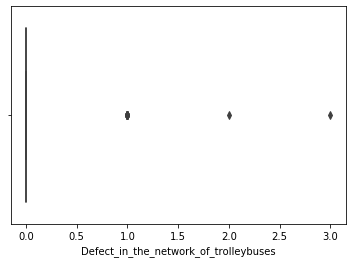

In [725]:
import seaborn as sns
sns.boxplot(x=traffic_df_filtered['Defect_in_the_network_of_trolleybuses'])

In [726]:
traffic_df_filtered['Defect_in_the_network_of_trolleybuses'].unique()

array([0., 1., 3., 2.])

In [727]:
#mean_d = traffic_df['Defect_in_the_network_of_trolleybuses'].median()



#traffic_df['Defect_in_the_network_of_trolleybuses'] = traffic_df['Defect_in_the_network_of_trolleybuses'].astype(str).astype(float)

In [728]:

z = np.abs(stats.zscore(traffic_df['Defect_in_the_network_of_trolleybuses']))
print(z)

[0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 1.10662642 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 1.10662642 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 1.10662642 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 1.10662642 1.10662642 0.12295849
 0.12295849 0.12295849 1.10662642 0.12295849 0.12295849 0.12295849
 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849 0.12295849
 3.56579624 1.10662642 0.12295849 0.12295849 0.12295849 0.1229

In [729]:
X = df.iloc[:,0:17]
y = df.iloc[:,-1]

corrmat = df.corr()

top_corr_features = corrmat.index


In [731]:
traffic_df_filtered.shape

(137, 18)

In [736]:
group_names = [5, 10, 15, 20, 25]
traffic_df_filtered['slowness_traffic_Percent_binned'] = pd.cut(traffic_df_filtered['Slowness_in_traffic_percent'], 5, labels=group_names)

In [737]:
show_unique_values(traffic_df_filtered)

Unique value for dataset attributes :

Hour   [ 7.   7.3  8.   8.3  9.   9.3 10.  10.3 11.  11.3 12.  13.  13.3 14.
 14.3 15.  15.3 16.  16.3 17.  17.3 18.  18.3 19.  19.3 20.  12.3] 

Immobilized_bus   [0. 2. 1. 4.] 

Broken_Truck   [0. 2. 1. 4. 3.] 

Vehicle_excess   [1. 0.] 

Accident_victim   [0. 1. 2. 3.] 

Running_over   [0. 1.] 

Fire_vehicles   [0. 1.] 

Occurrence_involving_freight   [0. 1.] 

Incident_involving_dangerous_freight   [0. 1.] 

Lack_of_electricity   [0. 1. 2. 4. 3.] 

Fire   [0. 1.] 

Point_of_flooding   [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00] 

Manifestations   [0. 1.] 

Defect_in_the_network_of_trolleybuses   [0. 1. 3. 2.] 

Tree_on_the_road   [0. 1.] 

Semaphore_off   [0. 1. 2. 4.] 

Intermittent_Semaphore   [0. 1.] 

Slowness_in_traffic_percent   [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.8  4.9  5.1
  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.  10.3
  7.9  7.7  8.5  7.8  9.3 11.  12.1 13.1 13.7 15.3 16.8 15.6  3.4  3.8
  5.9 

In [739]:
traffic_df_filtered[['Slowness_in_traffic_percent','slowness_traffic_Percent_binned']].tail(10)

,Slowness_in_traffic_percent,slowness_traffic_Percent_binned
130,11.3,10
131,11.3,10
132,13.0,15
133,14.6,15
134,17.4,20
135,17.8,20
136,18.1,20
137,17.7,20
138,17.4,20
139,12.1,15


In [740]:
#column reduction
traffic_df_filtered = traffic_df_filtered.drop(['Slowness_in_traffic_percent'], axis=1) 

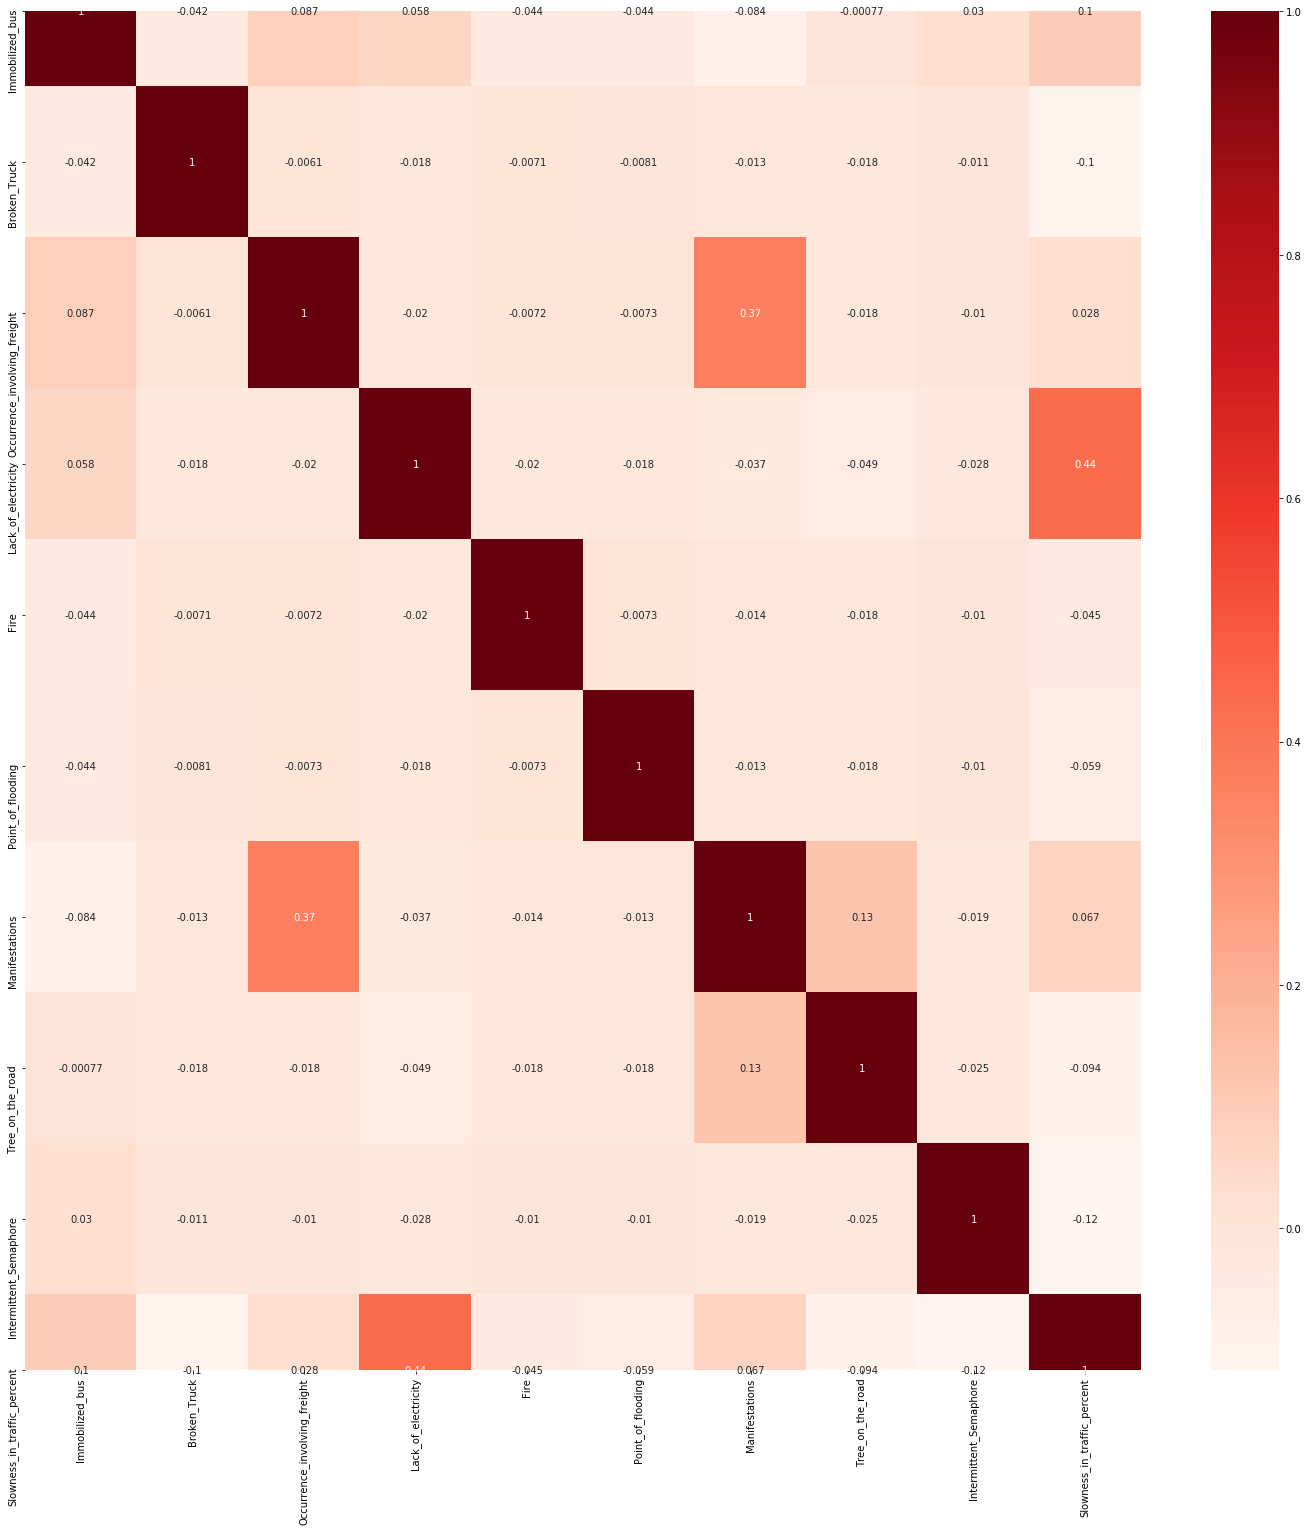

In [741]:
plt.figure(figsize=(25,25))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [746]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [747]:
import matplotlib.pyplot as plt

In [748]:
def show_top_decition_classifier_feature(data, classifier, top_k):
    #Prepare the independent and dependent attributes sets
    X = data.iloc[:,1:17]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if classifier == "ExtraTreesClassifier":
        classifier = ExtraTreesClassifier
    elif classifier == "DecisionTreeClassifier":
        classifier = DecisionTreeClassifier
       
    model = classifier()
    model.fit(X,y)

    #use inbuilt class feature_importances of tree based classifiers
    print(model.feature_importances_) 

    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(top_k).plot(kind='barh')
    plt.show()

[0.06118888 0.28102473 0.02567855 0.14598794 0.06548869 0.02118072
 0.         0.01780676 0.05994065 0.00610104 0.11599754 0.
 0.07046266 0.06240447 0.03864466 0.02809273]


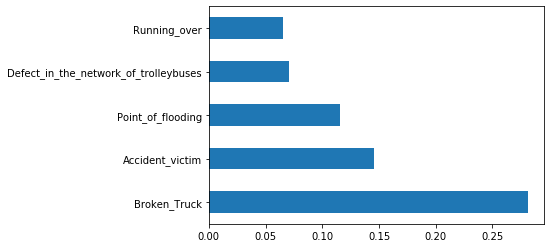

In [749]:
show_top_decition_classifier_feature(traffic_df_filtered, "DecisionTreeClassifier", 5)